# **KASDD F1 Lap time - Biasa Aja**

### Import Dataset

In [2]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



f1_data_raw = pd.read_csv("f1_train.csv")
f1_data = f1_data_raw.copy()
f1_data

,ID,Time,LapTime,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Deleted,DeletedReason,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,14609,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 02:25:08.325000,NaN,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,...,False,NaN,17.1,68.0,1008.0,False,24.8,157,3.0,Participant
1,3211,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,NaN,NaN,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,...,False,NaN,25.0,49.0,1008.5,False,43.3,275,1.0,Podium
2,2497,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,NaN,NaN,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,...,False,NaN,17.6,57.0,1018.2,False,29.9,0,0.6,Participant
3,13639,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,0 days 00:14:44.885000,NaN,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,...,False,NaN,17.6,67.0,1007.7,False,29.5,135,1.8,Podium
4,1280,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,NaN,NaN,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,...,False,NaN,26.1,55.0,1011.0,False,31.0,271,1.3,Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,12769,0 days 01:27:00.913000,0 days 00:01:25.235000,2.0,NaN,NaN,0 days 00:00:30.620000,0 days 00:00:30.668000,0 days 00:00:23.947000,0 days 01:26:06.294000,...,False,NaN,29.3,32.0,988.4,False,49.9,252,1.2,Participant
18784,16394,0 days 01:21:32.309000,0 days 00:01:40.363000,1.0,NaN,NaN,0 days 00:00:29.488000,0 days 00:00:42.838000,0 days 00:00:28.037000,0 days 01:20:21.469000,...,False,NaN,30.0,72.0,1009.0,False,36.8,145,1.1,Participant
18785,13600,0 days 02:00:31.678000,0 days 00:01:52.495000,3.0,NaN,NaN,0 days 00:00:32.659000,0 days 00:00:49.567000,0 days 00:00:30.269000,0 days 01:59:11.871000,...,False,NaN,17.6,66.0,966.7,False,30.3,146,1.1,Participant
18786,11924,0 days 01:07:59.947000,0 days 00:01:25.938000,1.0,NaN,NaN,0 days 00:00:30.564000,0 days 00:00:31.370000,0 days 00:00:24.004000,0 days 01:07:04.556000,...,False,NaN,28.8,33.0,988.5,False,50.1,134,1.5,Participant


In [3]:
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18788 non-null  int64  
 1   Time                18788 non-null  object 
 2   LapTime             18498 non-null  object 
 3   Stint               18788 non-null  float64
 4   PitOutTime          1039 non-null   object 
 5   PitInTime           735 non-null    object 
 6   Sector1Time         18381 non-null  object 
 7   Sector2Time         18749 non-null  object 
 8   Sector3Time         18696 non-null  object 
 9   Sector1SessionTime  18344 non-null  object 
 10  Sector2SessionTime  18749 non-null  object 
 11  Sector3SessionTime  18696 non-null  object 
 12  SpeedI1             15871 non-null  float64
 13  SpeedI2             18749 non-null  float64
 14  SpeedFL             18013 non-null  float64
 15  SpeedST             17096 non-null  float64
 16  IsPe

### Preprocessing

In [4]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64']) 
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

In [5]:
cek_null(f1_data)

                    Total    Percent
IsPersonalBest         30   0.159676
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
SpeedI2                39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


In [6]:
print("Jumlah duplikasi data : " + str(f1_data.duplicated().sum()))

Jumlah duplikasi data : 0


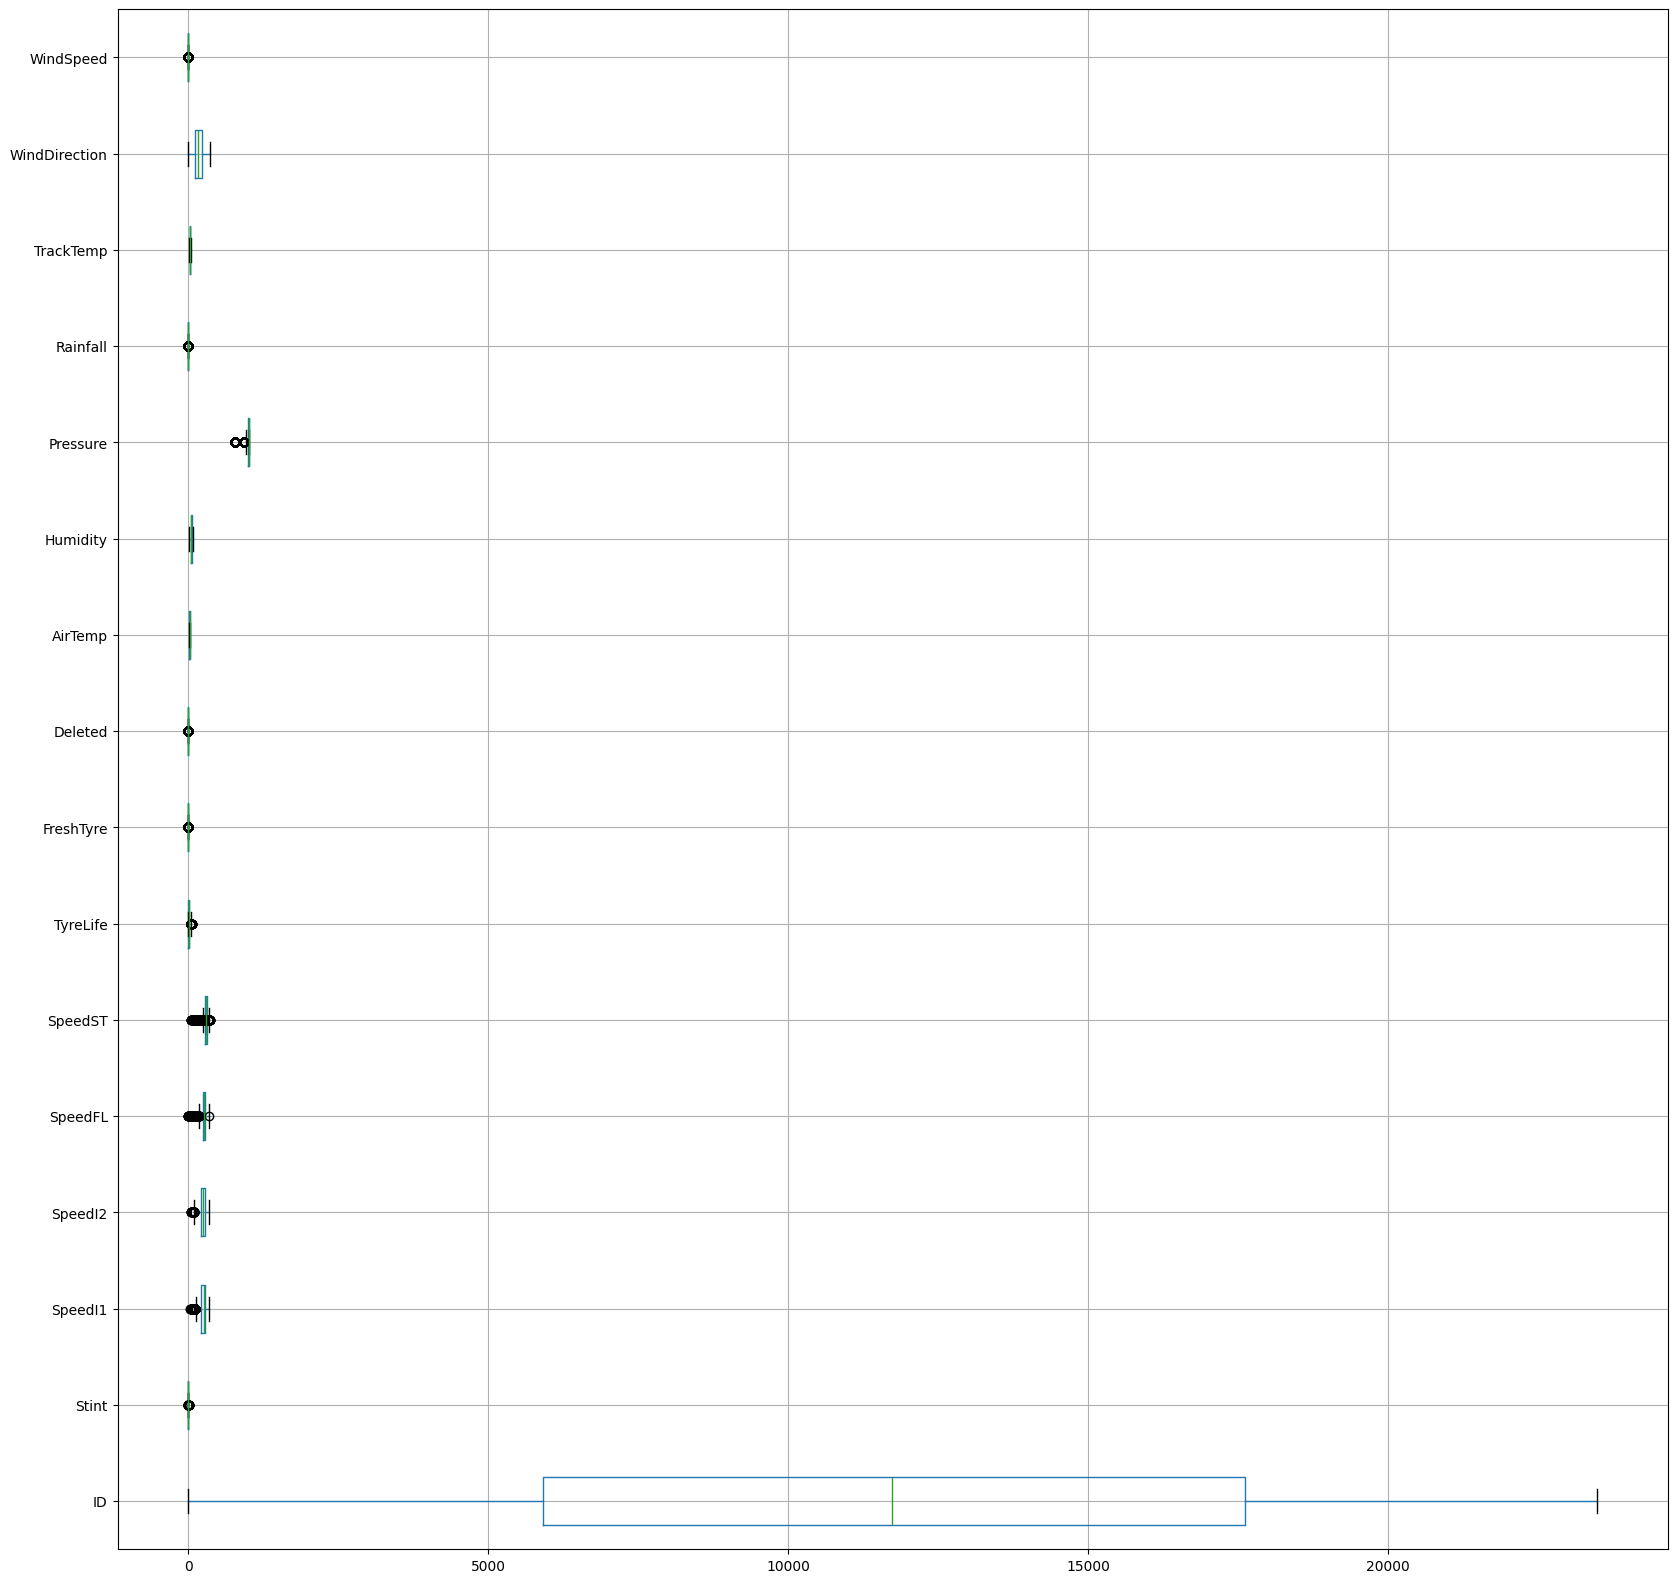

In [12]:
f1_data.boxplot(vert=False,figsize=(20,20))
plt.show()

In [8]:
laptime_numerical = f1_data.select_dtypes(include=['float64', 'int64']) 
Q1 = laptime_numerical.quantile(0.25)
Q3 = laptime_numerical.quantile(0.75)
IQR = Q3 - Q1

In [10]:
print(cek_outlier(f1_data))

               outliers  percentage
Pressure           2974    0.158293
WindSpeed          1508    0.080264
SpeedST            1235    0.065733
TyreLife            366    0.019481
SpeedFL             234    0.012455
SpeedI1             213    0.011337
SpeedI2              94    0.005003
Stint                56    0.002981
ID                    0    0.000000
AirTemp               0    0.000000
Humidity              0    0.000000
TrackTemp             0    0.000000
WindDirection         0    0.000000
